# Image Recogniton Project

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mnist = fetch_openml("mnist_784", version=1) # Data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# Understand the data
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Features / Variables
x = mnist["data"] 

In [12]:
x.info()
# 784 columns, 70000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [13]:
# Target
y = mnist["target"]

In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [19]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [22]:
number = x.iloc[69999]
number_image = np.reshape(np.ravel(number), (28, 28))

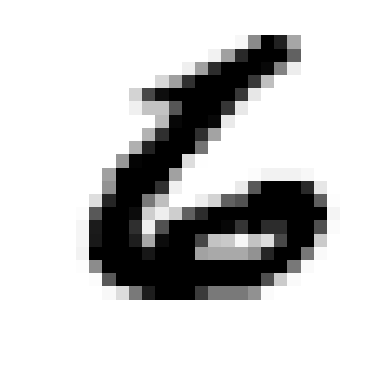

In [24]:
# Plot a number
plt.imshow(number_image, cmap="binary")
plt.axis("off")
plt.show()

In [35]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.14285714)
# X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [38]:
error_rate = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

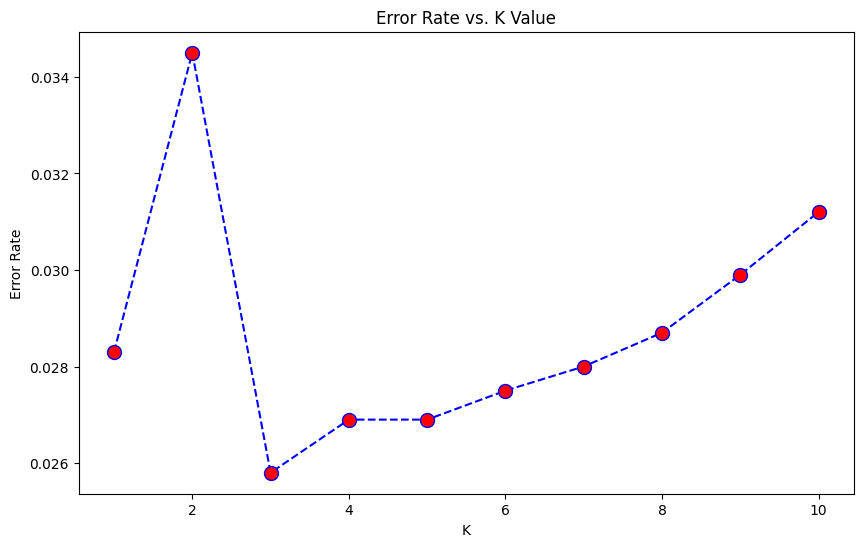

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), error_rate, color="blue", linestyle="dashed",
         marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [43]:
# The best value will be K=3 for our model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [44]:
# Accuracy Score
print(accuracy_score(y_test, knn_predictions))

0.9742


In [47]:
print("Confusion matrix for K=3:")
print(confusion_matrix(y_test, knn_predictions))
print("\n")

print("Classification report for K=3:")
print(classification_report(y_test, knn_predictions))
print("\n")

Confusion matrix for K=3:
[[1007    0    2    0    0    1    4    0    0    1]
 [   1 1044    0    0    0    0    0    2    0    1]
 [   9    2  988    2    1    0    0   10    1    1]
 [   1    2    9  986    0    9    0    4    9    3]
 [   0    6    0    1  999    0    2    1    0   12]
 [   4    2    0    5    1  868    4    0    3    3]
 [   4    1    1    0    1    3  986    0    0    0]
 [   1   10    1    0    2    0    0  980    0   11]
 [   2   11    2   20    6   14    2    4  897    6]
 [   4    1    1    8   11    2    1    8    1  987]]


Classification report for K=3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1015
           1       0.97      1.00      0.98      1048
           2       0.98      0.97      0.98      1014
           3       0.96      0.96      0.96      1023
           4       0.98      0.98      0.98      1021
           5       0.97      0.98      0.97       890
           6       0.99      0.

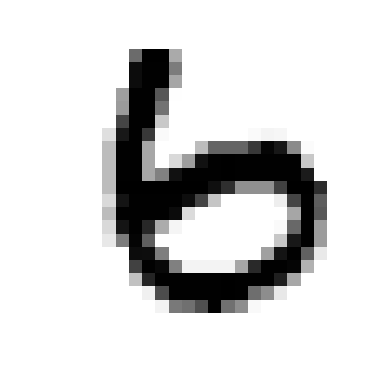

In [52]:
# Check with some examples
number1 = X_test.iloc[7362]
number1_image = np.reshape(np.ravel(number1), shape=(28,28))
plt.imshow(number1_image, cmap="binary")
plt.axis("off")
plt.show()

In [56]:
knn_predictions[7362]

'6'

In [57]:
number2 = X_test.iloc[0]
number3 = X_test.iloc[9999]
number2_image = np.reshape(np.ravel(number2), (28, 28))
number3_image = np.reshape(np.ravel(number3), (28, 28))

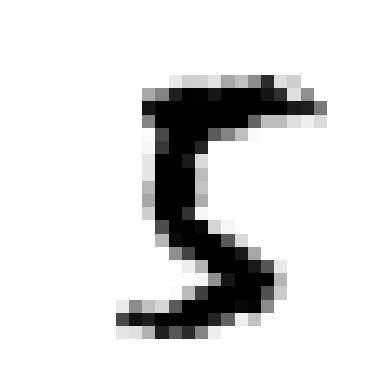

In [62]:
plt.imshow(number2_image, cmap="binary")
plt.axis("off")
plt.show()

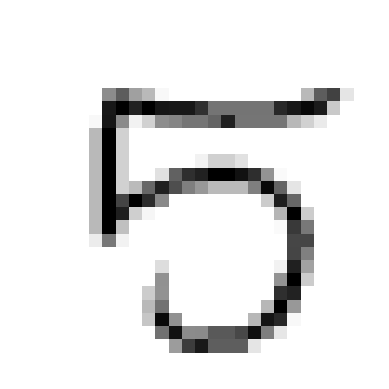

In [63]:
plt.imshow(number3_image, cmap="binary")
plt.axis("off")
plt.show()

In [64]:
knn_predictions[0]

'5'

In [67]:
knn_predictions[9999]

'5'